<font color='orange'><h1>Task 5 : Exploratory Data Analysis - Sports</h1></font>


### Name :Utkarsha Sathe



In [ ]:
# importing main libraries which are going to useable throughout the analysis.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#Lets import the dataset from local drive.

match = pd.read_csv(r"matches.csv")
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
# Lets see the shape of the dataset
match.shape

(756, 18)

In [ ]:
# Lets look the view of dataset by description()
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
# Lets take a look of the info of dataset
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

<font color = "lightgreen"><h3>As per the above information, "Rising Pune Supergiant" and "Rising Pune Supergiants" two names have been found for "Rising Pune Supergiants" so we need to correct it.</h3></font>

<font color = "lightgreen"><h3>"Rising Pune Supergiants" need to update in "team1","team2","toss_winner","winner" collumns from "matches.csv" and "batting_team" column in "deliveries.csv". So lets do it as following.</h3></font>

In [ ]:
# Lets correct the team name from "Rising Pune Supergiant" to "Rising Pune Supergiants" as per above listed columns.

#df['column name'] = df['column name'].replace(['old value'],'new value')
match['team1'] = match['team1'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')
match['team2'] = match['team2'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')
match['toss_winner'] = match['toss_winner'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')
match['winner'] = match['winner'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')

In [ ]:
# Lets find the null values in the dataset.
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

<font color = "lightgreen"><h3>As per above list, We can clearly see that "City" have 7 null values, while "winner", "player_of_match", "umpire1", "umpire2" and "umpire3" have 4, 4, 2, 2 and 637 null values respectively. So lets fill the null values with "N/A" as per following.</h3></font>

In [ ]:
# Lets fill the null values

match['city'] = match['city'].fillna('N/A')
match['winner'] = match['winner'].fillna('N/A')
match['player_of_match'] = match['player_of_match'].fillna("N/A")
match['umpire1'] = match['umpire1'].fillna('N/A')
match['umpire2'] = match['umpire2'].fillna('N/A')
match['umpire3'] = match['umpire3'].fillna('N/A')

In [ ]:
# After filling null values, Now, Lets check weather the datatset have any null values in to it or not.
match.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

<font color = "orange"><h1>Lets analyse "Man of The Match" award winner.</h1></font>

In [ ]:
Man_of_The_Match = match['player_of_match'].value_counts()
Man_of_The_Match

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
                  ..
P Shaw             1
R Bhatia           1
MD Mishra          1
TM Dilshan         1
S Sreesanth        1
Name: player_of_match, Length: 227, dtype: int64

<font color = "orange"><h3>Lets analyse Mostly selected top 10 Man Of The Match Candidates from the availabe data. </h3></font>

In [ ]:
top_Man_Of_The_Match = Man_of_The_Match.head(10)
top_Man_Of_The_Match

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

<font color = "orange"><h3>Lets visualize the above analysed data into the bar graph.</h3></font>

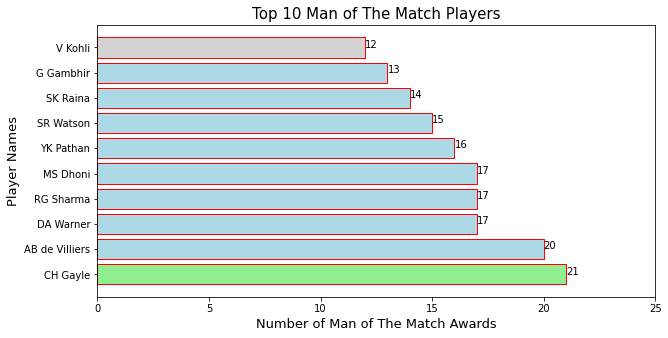

In [ ]:
plt.figure(figsize=(10,5))

x = top_Man_Of_The_Match.index
y = top_Man_Of_The_Match.values

plt.barh(x, y, color=['lightgreen','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightgray'], edgecolor='red')
#sns.barplot(y,x)

for x,y in enumerate(y):
    plt.text(y,x,str(y))

plt.xlim(0,25)
plt.xlabel('Number of Man of The Match Awards', fontsize = 13)
plt.ylabel('Player Names',fontsize=13)
plt.title('Top 10 Man of The Match Players',fontsize=15)
plt.show()

<font color="orange"><h1>From the above graph we can say that.</h1></font>
    
####    -> "Man Of The Match" award has been presented to "Chris Gayle" for 21 times. Which is most time high frequency from available data at 1st rank.
    
####    -> "AB de Villiers" is just one more award back to the "Chris Gayle" in the competition of Man of The Match Awards. at 2nd rank.
    
####    -> While "AM Rahane" is at the 10th position on the "Man of The Match" chart board.

<font color='orange'><h1>Lets present the above data in pie cart as well to see the result with another way</h1></font>

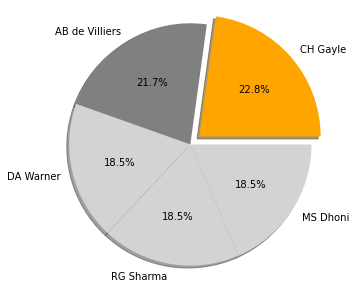

In [ ]:
# Lets analyse top 5 Players who are currently elegible for Man of The Match Award. 

x = top_Man_Of_The_Match.head(5).index
y = top_Man_Of_The_Match.head(5).values
ep = (0.1,0,0,0,0)

fig, ax = plt.subplots(figsize=(5,5))

ax.pie(y, explode=ep, labels=x, autopct='%1.1f%%',colors=['orange','gray','lightgray','lightgray','lightgray'],shadow=True)
ax.axis('equal')
plt.show()

### We have analysed for the top 5 players and got the result as per the above chart.

<font color = "orange"><h2> Lets analyse the Match Results on different bases.</h2></font>

In [ ]:
# Analysis of general Match Results.
Match_Results = match['result'].value_counts()
Match_Results

normal       743
tie            9
no result      4
Name: result, dtype: int64

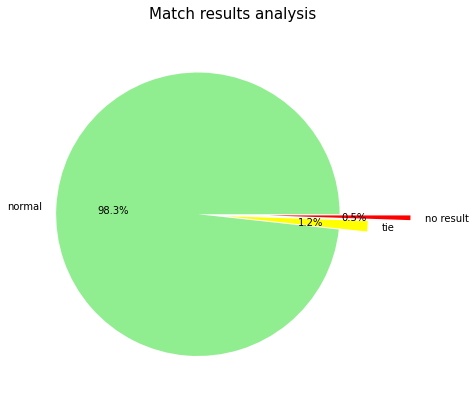

In [ ]:
# Lets analyse the match Results in a graphical way. 

x = Match_Results.index
y = Match_Results.values
ep = (0,0.2,0.5)

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(y, explode=ep, labels=x, autopct='%1.1f%%',shadow=False,center=(0,1),colors=['lightgreen','yellow','red'])
ax.axis('equal')
plt.title("Match results analysis", fontsize=15)
plt.show()

#### From the above visualization we can say that overall 0.5% of matches had "no results" while only 1.2% of matched has been declared as "tie".

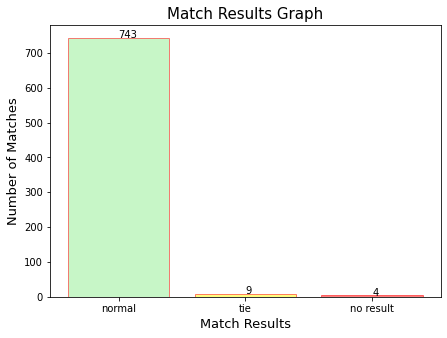

In [ ]:
plt.figure(figsize=(7,5))

x = Match_Results.index
y = Match_Results.values

plt.bar(x, y, align='center', alpha=0.5, color=['lightgreen','yellow','red'], edgecolor='red')

for x,y in enumerate(y):
    plt.text(x,y,str(y))
    
plt.xlabel('Match Results',fontsize=13)
plt.ylabel('Number of Matches',fontsize=13)
plt.title('Match Results Graph',fontsize=15)
plt.show()

## Analysing the Teams choose to Bat or Field after Won the Toss

In [ ]:
Toss = match['toss_decision'].value_counts()
Toss

field    463
bat      293
Name: toss_decision, dtype: int64

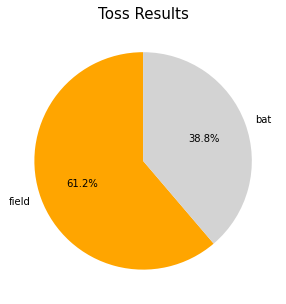

In [ ]:
# Lets plot the pie plot for above data
plt.figure(figsize=(5,5))
plt.pie(Toss,labels=np.array(Toss.index),startangle=90,autopct="%1.1f%%",colors=['orange','lightgray'])
plt.title("Toss Results",fontsize=15)
plt.show()

In [ ]:
# Lets analyse the Results of Toss

In [ ]:
# Toss winner Teams

Toss_Win = match['toss_winner'].value_counts()
Toss_Win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

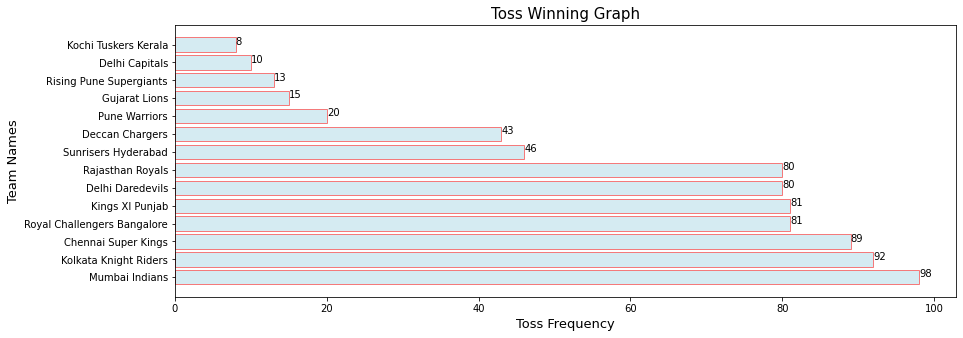

In [ ]:
plt.figure(figsize=(14,5))

x = Toss_Win.index
y = Toss_Win.values

plt.barh(x, y, alpha=0.5, color='lightblue', edgecolor='red')

for x,y in enumerate(y):
    plt.text(y,x,str(y))
    
plt.xlabel('Toss Frequency',fontsize=13)
plt.ylabel('Team Names',fontsize=13)
plt.title('Toss Winning Graph',fontsize=15)

plt.show()

### From the above graphical representation, we can say that "Mumbai Indians" is the Team who Won the Highest Toss while "Kochi Tuskers Kerala" Won the all time less Toss ascompared to other Teams.

In [ ]:
# Lets analyse the Teams who won by runs. 

In [ ]:
Won_Toss_Bat_First = match[match['toss_decision']=='bat']
Won_Toss_Field_First = match[match['toss_decision']=='field']

In [ ]:
Won_Toss_Bat_First_Won_By_Runs = Won_Toss_Bat_First[Won_Toss_Bat_First['win_by_runs']!=0]
#Won_Toss_Bat_First_Won_By_Runs

In [ ]:
Won_Toss_Bat_First_Won_By_Wickets = Won_Toss_Bat_First[Won_Toss_Bat_First['win_by_wickets']!=0]
#Won_Toss_Bat_First_Won_By_Wickets

In [ ]:
Won_Toss_Field_First_Won_By_Runs = Won_Toss_Field_First[Won_Toss_Field_First['win_by_runs']!=0]
#Won_Toss_Field_First_Won_By_Runs

In [ ]:
Won_Toss_Field_First_Won_By_Wickets = Won_Toss_Field_First[Won_Toss_Field_First['win_by_wickets']!=0]
#Won_Toss_Field_First_Won_By_Wickets

In [ ]:
WTBFWBR = Won_Toss_Bat_First_Won_By_Runs
WTBFWBW = Won_Toss_Bat_First_Won_By_Wickets
WTFFWBR = Won_Toss_Field_First_Won_By_Runs
WTFFWBW = Won_Toss_Field_First_Won_By_Wickets

print("Won the Toss, Choose to Bat First and Won the Match by Runs : ",WTBFWBR['result'].value_counts())
print("\nWon the Toss, Choose to Bat First and Won the Match by Wickets : ",WTBFWBW['result'].value_counts())
print("\nWon the Toss, Choose to Field First and Won the Match by Runs : ",WTFFWBR['result'].value_counts())
print("\nWon the Toss, Choose to Field First and Won the Match by Wickets : ",WTFFWBW['result'].value_counts())

Won the Toss, Choose to Bat First and Won the Match by Runs :  normal    135
Name: result, dtype: int64

Won the Toss, Choose to Bat First and Won the Match by Wickets :  normal    153
Name: result, dtype: int64

Won the Toss, Choose to Field First and Won the Match by Runs :  normal    202
Name: result, dtype: int64

Won the Toss, Choose to Field First and Won the Match by Wickets :  normal    253
Name: result, dtype: int64


## Analysis of the Teams Won the Toss, Choose to Bat First and Won the Match by Runs

Analysis of the Teams Won the Toss, Choose to Bat First and Won the Match by Runs :

 Chennai Super Kings            31
Mumbai Indians                 24
Kolkata Knight Riders          16
Rajasthan Royals               14
Delhi Daredevils               12
Deccan Chargers                11
Royal Challengers Bangalore     9
Sunrisers Hyderabad             8
Kings XI Punjab                 6
Pune Warriors                   3
Delhi Capitals                  1
Name: toss_winner, dtype: int64


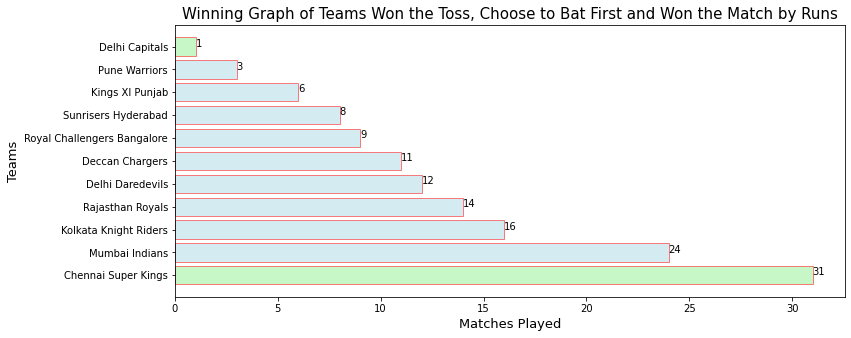

In [ ]:
#WTBFWBR
print("Analysis of the Teams Won the Toss, Choose to Bat First and Won the Match by Runs :\n\n",WTBFWBR['toss_winner'].value_counts())

plt.figure(figsize=(12,5))

x = WTBFWBR['toss_winner'].value_counts().index
y = WTBFWBR['toss_winner'].value_counts().values

plt.barh(x, y, alpha=0.5, color=['lightgreen','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue'], edgecolor='red')

for index, value in enumerate(y):
    plt.text(value, index,str(value))
    
plt.xlabel('Matches Played',fontsize=13)
plt.ylabel('Teams',fontsize=13)
plt.title("Winning Graph of Teams Won the Toss, Choose to Bat First and Won the Match by Runs",fontsize=15)
plt.show()

## Analysis of the Teams Won the Toss, Choose to Bat First and Won the Match by Wickets


Analysis of the Teams Won the Toss, Choose to Bat First and Won the Match by Wickets :
 Kings XI Punjab                20
Mumbai Indians                 19
Chennai Super Kings            17
Rajasthan Royals               17
Delhi Daredevils               16
Kolkata Knight Riders          14
Deccan Chargers                13
Sunrisers Hyderabad            12
Royal Challengers Bangalore    10
Pune Warriors                   8
Rising Pune Supergiants         3
Kochi Tuskers Kerala            3
Delhi Capitals                  1
Name: toss_winner, dtype: int64


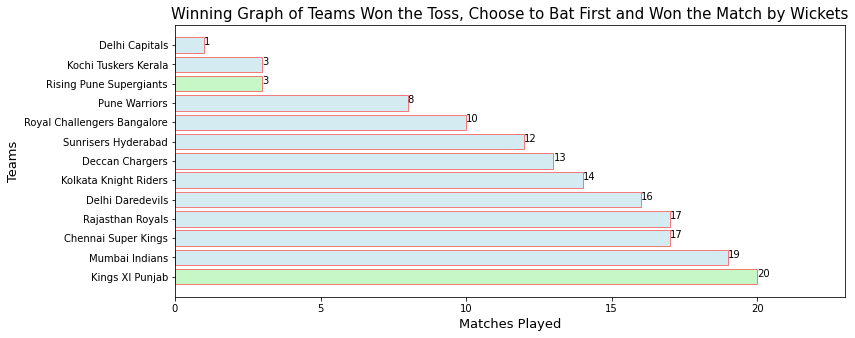

In [ ]:
#WTBFWBW

print("\nAnalysis of the Teams Won the Toss, Choose to Bat First and Won the Match by Wickets :\n",WTBFWBW['toss_winner'].value_counts())

plt.figure(figsize=(12,5))

x = WTBFWBW['toss_winner'].value_counts().index
y = WTBFWBW['toss_winner'].value_counts().values

plt.barh(x, y, alpha=0.5, color=['lightgreen','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue'], edgecolor='red')

for index, value in enumerate(y):
    plt.text(value, index,str(value))
    
plt.xlim(0,23)
plt.xlabel('Matches Played',fontsize=13)
plt.ylabel('Teams',fontsize=13)
plt.title("Winning Graph of Teams Won the Toss, Choose to Bat First and Won the Match by Wickets",fontsize=15)
plt.show()

## Analysis of the Teams Won the Toss, Choose to Field First and Won the Match by Runs


Analysis of the Teams Won the Toss, Choose to Field First and Won the Match by Runs :
 Royal Challengers Bangalore    28
Delhi Daredevils               27
Kings XI Punjab                26
Kolkata Knight Riders          24
Mumbai Indians                 23
Rajasthan Royals               19
Chennai Super Kings            13
Sunrisers Hyderabad            11
Deccan Chargers                11
Pune Warriors                   9
Rising Pune Supergiants         4
Gujarat Lions                   4
Delhi Capitals                  2
Kochi Tuskers Kerala            1
Name: toss_winner, dtype: int64


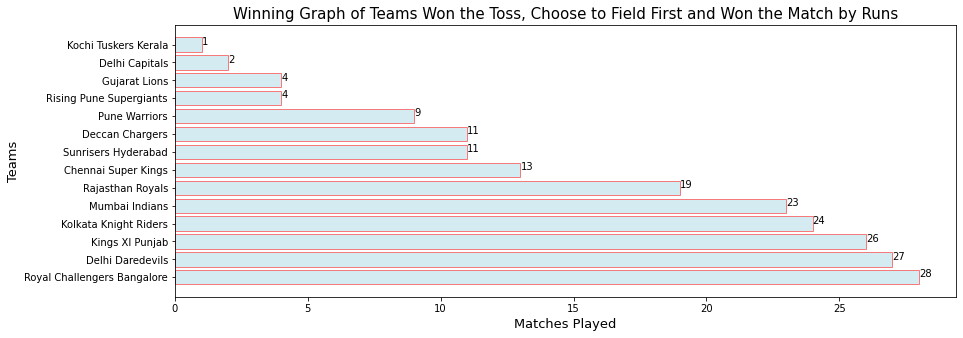

In [ ]:
#WTFFWBR

print("\nAnalysis of the Teams Won the Toss, Choose to Field First and Won the Match by Runs :\n", WTFFWBR['toss_winner'].value_counts())

plt.figure(figsize=(14,5))

x = WTFFWBR['toss_winner'].value_counts().index
y = WTFFWBR['toss_winner'].value_counts().values

plt.barh(x, y, alpha=0.5, color='lightblue', edgecolor='red')

for index, value in enumerate(y):
    plt.text(value, index,str(value))
    
#plt.xlim(0,30)
plt.xlabel('Matches Played',fontsize=13)
plt.ylabel('Teams',fontsize=13)
plt.title("Winning Graph of Teams Won the Toss, Choose to Field First and Won the Match by Runs",fontsize=15)
plt.show()

## Analysis of the Teams Won the Toss, Choose to Field First and Won the Match by Wickets


Analysis of the Teams Won the Toss, Choose to Field First and Won the Match by Wickets :
 Kolkata Knight Riders          37
Royal Challengers Bangalore    31
Mumbai Indians                 31
Kings XI Punjab                28
Chennai Super Kings            27
Rajasthan Royals               27
Delhi Daredevils               24
Sunrisers Hyderabad            15
Gujarat Lions                  10
Deccan Chargers                 8
Rising Pune Supergiants         6
Delhi Capitals                  5
Kochi Tuskers Kerala            4
Name: toss_winner, dtype: int64


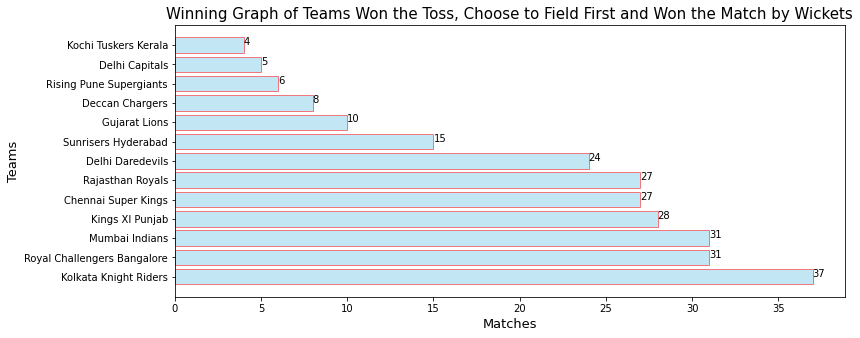

In [ ]:
#WTFFWBW

print("\nAnalysis of the Teams Won the Toss, Choose to Field First and Won the Match by Wickets :\n",WTFFWBW['toss_winner'].value_counts())

plt.figure(figsize=(12,5))

x = WTFFWBW['toss_winner'].value_counts().index
y = WTFFWBW['toss_winner'].value_counts().values

plt.barh(x, y, alpha=0.5, color='skyblue', edgecolor='red')

for index, value in enumerate(y):
    plt.text(value, index,str(value))
    
plt.xlabel('Matches',fontsize=13)
plt.ylabel('Teams',fontsize=13)
plt.title("Winning Graph of Teams Won the Toss, Choose to Field First and Won the Match by Wickets",fontsize=15)
plt.show()

## Analysis of matches played by City

In [ ]:
Match_By_City = match['city'].value_counts()
Match_By_City.head(10)

Mumbai        101
Kolkata        77
Delhi          74
Bangalore      66
Hyderabad      64
Chennai        57
Jaipur         47
Chandigarh     46
Pune           38
Durban         15
Name: city, dtype: int64


Analysis of the Teams Won the Toss, Choose to Field First and Won the Match by Wickets :
 Kolkata Knight Riders          37
Royal Challengers Bangalore    31
Mumbai Indians                 31
Kings XI Punjab                28
Chennai Super Kings            27
Rajasthan Royals               27
Delhi Daredevils               24
Sunrisers Hyderabad            15
Gujarat Lions                  10
Deccan Chargers                 8
Rising Pune Supergiants         6
Delhi Capitals                  5
Kochi Tuskers Kerala            4
Name: toss_winner, dtype: int64


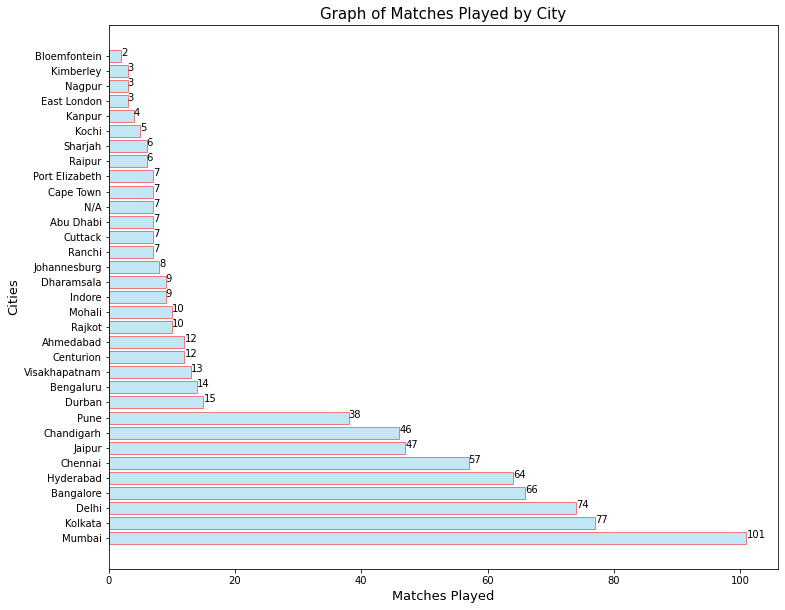

In [ ]:
#WTFFWBW
print("\nAnalysis of the Teams Won the Toss, Choose to Field First and Won the Match by Wickets :\n",WTFFWBW['toss_winner'].value_counts())

plt.figure(figsize=(12,10))

x = Match_By_City.index
y = Match_By_City.values

plt.barh(x, y, alpha=0.5, color='skyblue', edgecolor='red')

for index, value in enumerate(y):
    plt.text(value, index,str(value))
    
plt.xlabel('Matches Played',fontsize=13)
plt.ylabel('Cities',fontsize=13)
plt.title("Graph of Matches Played by City",fontsize=15)
plt.show()


# Lets Analyse the "deliveries.csv"

In [ ]:
deliv = pd.read_csv(r"deliveries.csv")
deliv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Lets merge the "id","season","winner"  from "matches.csv" to "deliveries.csv"

In [ ]:
df = deliv.merge(match[["id","season","winner"]], how="inner",left_on="match_id", right_on="id")
df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [ ]:
df['batting_team'] = df['batting_team'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')
df['bowling_team'] = df['bowling_team'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')

## Analysing for Total Fours and Sixes Recorded in the Scorbooks of the Every Teams

In [ ]:
fours = df[["batting_team", "batsman_runs", "batsman"]]

bound4 = fours[fours["batsman_runs"] == 4]
Bound4 = bound4.groupby("batting_team")["batsman_runs"].agg([("Fours", "count")])

bound6 = fours[fours["batsman_runs"] == 6]
Bound6 = bound6.groupby("batting_team")["batsman_runs"].agg([("Sixes", "count")])

Bound = Bound4.merge(Bound6, how="inner", right_on="batting_team", left_on="batting_team")
Bound

,Fours,Sixes
batting_team,,
Chennai Super Kings,2193,973
Deccan Chargers,957,400
Delhi Capitals,242,87
Delhi Daredevils,2158,801
Gujarat Lions,460,155
Kings XI Punjab,2458,976
Kochi Tuskers Kerala,170,53
Kolkata Knight Riders,2434,930
Mumbai Indians,2588,1096


In [ ]:
Tot_Fours_And_Sixes = Bound['Fours']+Bound['Sixes']
Tot_Fours_And_Sixes

batting_team
Chennai Super Kings            3166
Deccan Chargers                1357
Delhi Capitals                  329
Delhi Daredevils               2959
Gujarat Lions                   615
Kings XI Punjab                3434
Kochi Tuskers Kerala            223
Kolkata Knight Riders          3364
Mumbai Indians                 3684
Pune Warriors                   721
Rajasthan Royals               2716
Rising Pune Supergiants         525
Royal Challengers Bangalore    3492
Sunrisers Hyderabad            1977
dtype: int64

In [ ]:
type(Tot_Fours_And_Sixes)

pandas.core.series.Series

### Analysing the Fours and Sixes Scored by Each Teams

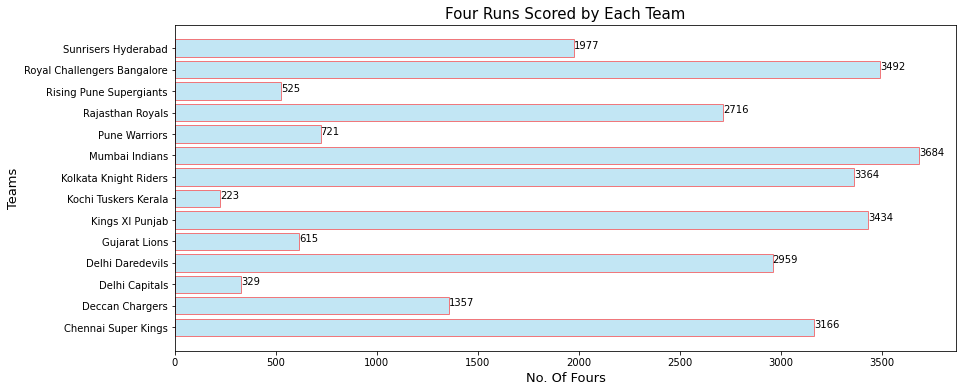

In [ ]:
plt.figure(figsize=(14,6))

x = Tot_Fours_And_Sixes.index
y = Tot_Fours_And_Sixes.values

plt.barh(x, y, alpha=0.5,align='center', color='skyblue', edgecolor='red')

for index, value in enumerate(y):
    plt.text(value, index,str(value))
    
plt.xlabel("No. Of Fours",fontsize=13)
plt.ylabel("Teams",fontsize=13)
plt.title("Four Runs Scored by Each Team", fontsize=15)
plt.show()

## Analysing for Batsman hitting Maximum Fours.

In [ ]:
bm = bound4.groupby("batsman")["batsman_runs"].agg([("Fours","count")])
bm_sort = bm.sort_values("Fours",ascending = False)
bm_sort.head()

,Fours
batsman,
S Dhawan,526
SK Raina,495
G Gambhir,492
V Kohli,482
DA Warner,459


In [ ]:
# Converting DataFrame into Series to perform further operations of Visualizations.
bm_sort_series = bm_sort.squeeze()

In [ ]:
type(bm_sort_series)

pandas.core.series.Series

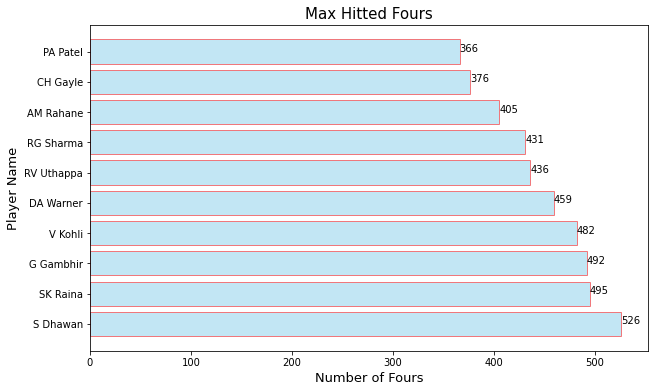

In [ ]:
# Lets Visualize the above data
Top4 = bm_sort_series.head(10)

x = Top4.index
y = Top4.values

plt.figure(figsize = (10,6))
plt.barh(x,y,alpha=0.5, color='skyblue', edgecolor='red')

for x,y in enumerate(y):
    plt.text(y,x,str(y))
    
plt.xlabel("Number of Fours", fontsize = 13)
plt.ylabel("Player Name", fontsize = 13)
plt.title("Max Hitted Fours", fontsize = 15)
#plt.xticks(rotation = 45, fontsize = 10)
plt.show()

## Analysing for Batsman hitting Maximum Sixes.

In [ ]:
bm6 = bound6.groupby("batsman")["batsman_runs"].agg([("Sixes", "count")])
bm6_sort = bm6.sort_values("Sixes",ascending = False)
bm6_sort.head(10)

,Sixes
batsman,
CH Gayle,327
AB de Villiers,214
MS Dhoni,207
SK Raina,195
RG Sharma,194
V Kohli,191
DA Warner,181
SR Watson,177
KA Pollard,175


In [ ]:
bm6_sort_series = bm6_sort.squeeze()
type(bm6_sort_series)

pandas.core.series.Series

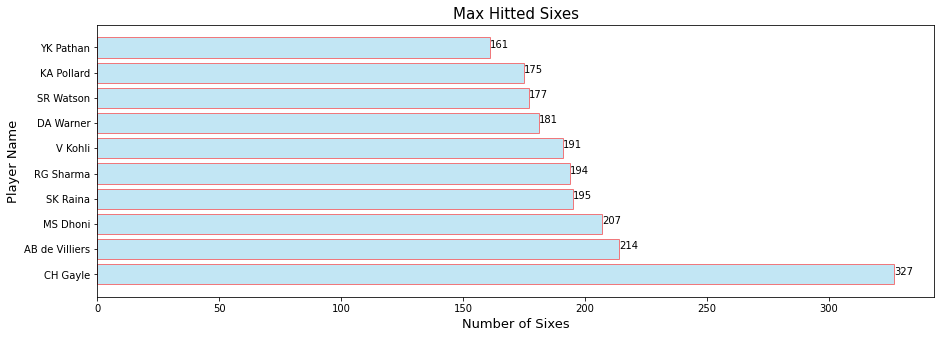

In [ ]:
# Lets Visualize the above data
Top6 = bm6_sort_series.head(10)

x = Top6.index
y = Top6.values

plt.figure(figsize = (15,5))
plt.barh(x,y,alpha=0.5, color='skyblue', edgecolor='red')

for x, y in enumerate(y):
    plt.text(y, x,str(y))
    
plt.xlabel("Number of Sixes", fontsize = 13)
plt.ylabel("Player Name", fontsize = 13)
plt.title("Max Hitted Sixes", fontsize = 15)
#plt.xticks(rotation = 45, fontsize = 10)
plt.show()

## Top 10 Batsmen Scoring Maximum Number of Runs

In [ ]:
bm_score = fours.groupby("batsman")['batsman_runs'].agg([("Runs", "sum")])
bm_score_sort = bm_score.sort_values("Runs", ascending = False)
bm_score_sort.head(10)

,Runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


In [ ]:
bm_score_series = bm_score_sort.squeeze()
type(bm_score_series)

pandas.core.series.Series

## Making a Bar Plot to Find Top 10 Batsman Scoring Most Runs

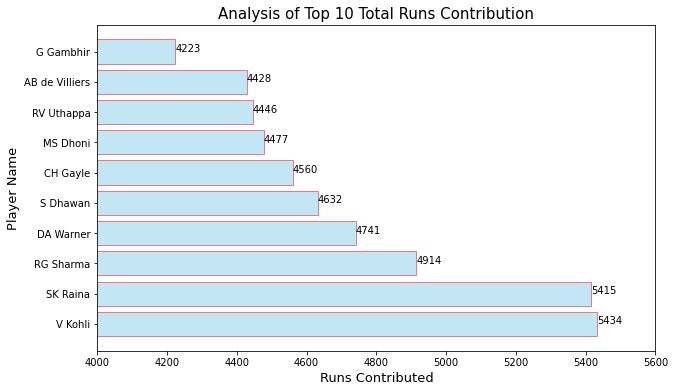

In [ ]:
# Lets Visualize the above data

Top10 = bm_score_series.head(10)

x = Top10.index
y = Top10.values

plt.figure(figsize = (10,6))
plt.barh(x,y,alpha=0.5, color='skyblue', edgecolor='red')

for x,y in enumerate(y):
    plt.text(y,x,str(y))
    
plt.xlim(4000,5600)
plt.xlabel("Runs Contributed", fontsize = 13)
plt.ylabel("Player Name", fontsize = 13)
plt.title("Analysis of Top 10 Total Runs Contribution", fontsize = 15)
#plt.xticks(rotation = 45, fontsize = 10)
plt.show()

## Lets make Analysis for the Top Bowlers

In [ ]:
wickets = deliv.dropna(subset = ['dismissal_kind'])
wickets = wickets[~wickets['dismissal_kind'].isin(['run out', 'retired hurt', 'obstructing the field'])]
bowlers = wickets.groupby("bowler")['dismissal_kind'].agg(['count']).reset_index()
bowlers = bowlers.rename(columns = {'count':'wickets'})
bowlers.head()

,bowler,wickets
0,A Ashish Reddy,18
1,A Chandila,11
2,A Choudhary,5
3,A Flintoff,2
4,A Joseph,6


In [ ]:
# Lets find top 10 Bowlers now

bowlers_sort = bowlers.sort_values("wickets", ascending = False, ignore_index=True, )
bowlers_sort.head(10)

,bowler,wickets
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


In [ ]:
bowlers_sort_seriesx = bowlers_sort['bowler'].squeeze()
bowlers_sort_seriesy = bowlers_sort['wickets'].squeeze()
print(type(bowlers_sort_seriesx))
print(type(bowlers_sort_seriesy))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


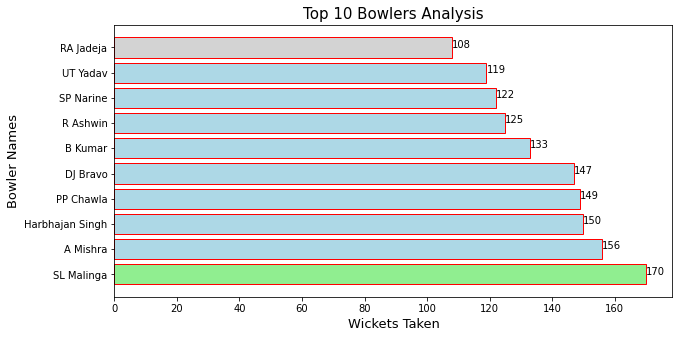

In [ ]:
#Lets Visualize the above data into Graphics

x = bowlers_sort_seriesx.head(10)
y = bowlers_sort_seriesy.head(10)

plt.figure(figsize=(10,5))

plt.barh(x,y,color=["lightgreen","lightblue","lightblue","lightblue","lightblue","lightblue","lightblue","lightblue","lightblue","lightgray"],edgecolor="red")

for x,y in enumerate(y):
    plt.text(y,x,str(y))

plt.xlabel("Wickets Taken",fontsize=13)
plt.ylabel("Bowler Names",fontsize=13)
plt.title("Top 10 Bowlers Analysis", fontsize=15)
plt.show()